## Ridge Regression

In [1]:
#Python version
!python --version #This assignment use the version of 3.6.0

Python 3.6.4 :: Anaconda, Inc.


In [2]:
#import library
import random
from random import seed #gives it its first "previous" value
import pandas as pd #build dataframe
import numpy as np #calculation
import matplotlib #plotting
import matplotlib.pyplot as plt #plotting
matplotlib.style.use('ggplot') #change plotting style

### Load Task2A_train.csv and Task2A_test.csv sets.

In [3]:
#read training data using pandas
trainset = pd.read_csv('Task2A_train.csv') 
#z-score normalization 
normalized_train=(trainset-trainset.mean())/trainset.std()

In [4]:
#split data into x label and y label
train_x=normalized_train.loc[:, normalized_train.columns != 'y']
train_y=normalized_train[['y']]

In [5]:
#read test data using pandas
testset = pd.read_csv('Task2A_test.csv') 
#z-score normalization 
normalized_test=(testset-testset.mean())/testset.std()

In [6]:
#split data into x and y label
test_x=normalized_test.loc[:, normalized_test.columns != 'y']
test_y=normalized_test[['y']]

### Step ii.	

implement SGD and BGD algorithms that you derived in Step I. The implementation is straightforward as you are allowed to use the code examples from Activity 1 in Module 2.

##### Building models:

In [7]:
# auxiliary function to calculate labels based on the estimated coefficients
def predict_func(phi, w):
    return phi.dot(w)

In [8]:
# auxiliary function to calculate a cost function
def train_obj_func(phi, w, label, lambda_number):
    #plus L2 norm
    error_func=((predict_func(phi, w)-label)**2).mean()+ 0.5 * lambda_number *(w.dot(w))
    return error_func

In [9]:
#get errors by each method
def get_errors(train_data, train_label, test_data, test_label, W):
    n_weights=len(W)
    #build a dataframe
    errors=pd.DataFrame(columns=['train_rate','test_rate'])
    for tau in range(n_weights):
        #write errors into each row
        errors.at[tau,'train_rate'] = float(train_obj_func(train_data, W.loc[tau].values,train_label['y'].values, 0))
        errors.at[tau,'test_rate'] =  float(train_obj_func(test_data, W.loc[tau].values,test_label['y'].values, 0))
    
    return errors

SGD model

In [10]:
#updata weights
def sgd_update_weight(W_prev, x, y_true, y_pred, lambda_number, eta):
    #partial derivative of bgd method with L2 norm
    grad=-(y_true-y_pred) *x+lambda_number*W_prev
    #using previous weight-learning rate* grad
    new_weight=W_prev-eta*grad
    return new_weight

In [11]:
def sgd_train(train_x, train_y, lambda_number, eta, epsilon, max_epoch):
    
    #number of rows in training data
    train_len=len(train_x)
    #max iteration
    tau_max=max_epoch*train_len
    
    #build a dataframe
    W=pd.DataFrame(columns=['weight_x1','weight_x2','weight_x3','weight_x4'])
    #random weight for first row
    W.loc[0]=[random.uniform(0,1) for n in range(4)]
    
    tau=0 #counter
    obj_func_val=pd.DataFrame(columns=['error'])
    obj_func_val.loc[0]=train_obj_func(train_x, W.iloc[tau].values, train_y['y'].values, lambda_number)
    
    #main loop
    while tau<=tau_max:
        # check termination criteria
        if obj_func_val.loc[tau]['error']<=epsilon:
            break
        else:
            #shuffle training data
            train_index=random.sample(range(0,train_len),train_len)
            
            #loop oer each datapoint
            for i in train_index:
                tau+=1
                
                if tau>tau_max:
                    break
                
                else:
                    #predict based on training data
                    y_pred=predict_func(train_x.iloc[i].values, W.iloc[tau-1].values)
                    # update the coefficient:
                    W.loc[tau]=sgd_update_weight(W.iloc[tau-1].values, train_x.iloc[i].values, train_y.iloc[i].values, y_pred, lambda_number, eta)
                
                    #keep track of the objective function
                    obj_func_val.loc[tau]=train_obj_func(train_x, W.iloc[tau].values, train_y['y'].values, lambda_number)
                
    #return dataframe on both errors and weights      
    return obj_func_val, W

BGD model

In [12]:
def bgd_update_weight(W_prev, x, y_true, y_pred, lambda_number, eta):
    #for each column, calculate column means
    l=['x1','x2','x3','x4']
    grad=[]
    for each in l:
        mean_value=-np.mean(train_x[each]*(y_true-y_pred))
        grad.append(mean_value)
    #partial derivative of bgd method with L2 norm
    return (W_prev - eta *(grad+lambda_number*W_prev))

In [13]:
seed(1)
def bgd_train(train_x, train_y, lambda_number, eta, epsilon, max_epoch):
    #calculate rows of training set
    train_len=len(train_x)
    #create a dataframe for recording weight
    W=pd.DataFrame(columns=['weight_x1','weight_x2','weight_x3','weight_x4'])
    #for initial weight, randomly generating weights
    W.loc[0]=[random.uniform(0,1) for n in range(4)]
    
    tau=0
    #build a error dataframe
    obj_func_val=pd.DataFrame(columns=['error'])
    #record first error with random weights
    obj_func_val.loc[0]=train_obj_func(train_x, W.loc[tau].values, train_y['y'].values, lambda_number)
    
    #for each iteration
    for tau in range(max_epoch):
        #if error less than threshold, then jump out of loop
        if obj_func_val.loc[0].values<=epsilon:
            break
        else:
            #predict y label
            y_pred=predict_func(train_x, W.loc[tau].values)
            #record w
            W.loc[tau+1]=bgd_update_weight(W.loc[tau].values, train_x, train_y['y'].values, y_pred, lambda_number, eta)
            #record error
            obj_func_val.loc[tau+1]=train_obj_func(train_x, W.loc[tau+1].values,train_y['y'].values, lambda_number)
    
    #return both error and weight dataframes
    return obj_func_val, W

### STEP III:
	Set the termination criterion as maximum of 20 weight updates for BGD, which is equivalent to 20 x N weight updates for SGD (where N is the number of training data).

In [14]:
max_epoch = 20 #maximum number of iteration
epsilon = .001 # a threshold on the cost (to terminate the process)
eta = .01 # learning rate
lambda_number=0.001 #lambda

### Question IV:
c.	Run your implementations of SGD and BGD while all parameter settings (initial values, learning rate etc) are exactly the same for both algorithms. During run, record training error rate every time the weights get updated. Create a plot of error rates (use different colors for SGD and BGD), where the x-axis is the number of visited data points and y-axis is the error rate. Save your plot in your Jupyter Notebook file for Question 6. Note that for every N errors for SGD in the plot, you will only have one error for BGD; the total length of the x-axis will be 20 x N

In [15]:
#train dataset with sgd method
train_res_sgd=sgd_train(train_x, train_y, lambda_number, eta, epsilon, max_epoch)
#calculate sgd errors
sgd_errors = get_errors(train_x,train_y,test_x,test_y, train_res_sgd[1])
#set dataframe index
sgd_errors.reset_index(inplace=True)

#train dataset with bgd method
train_res_bgd=bgd_train(train_x, train_y, lambda_number, eta, epsilon, max_epoch)
#calcute bgd errors
bgd_errors = get_errors(train_x,train_y,test_x,test_y, train_res_bgd[1])
#set dataframe index
bgd_errors.reset_index(inplace=True)

plotting training dataset with 2 dimensions (2 x-axis and 2 y-axis)

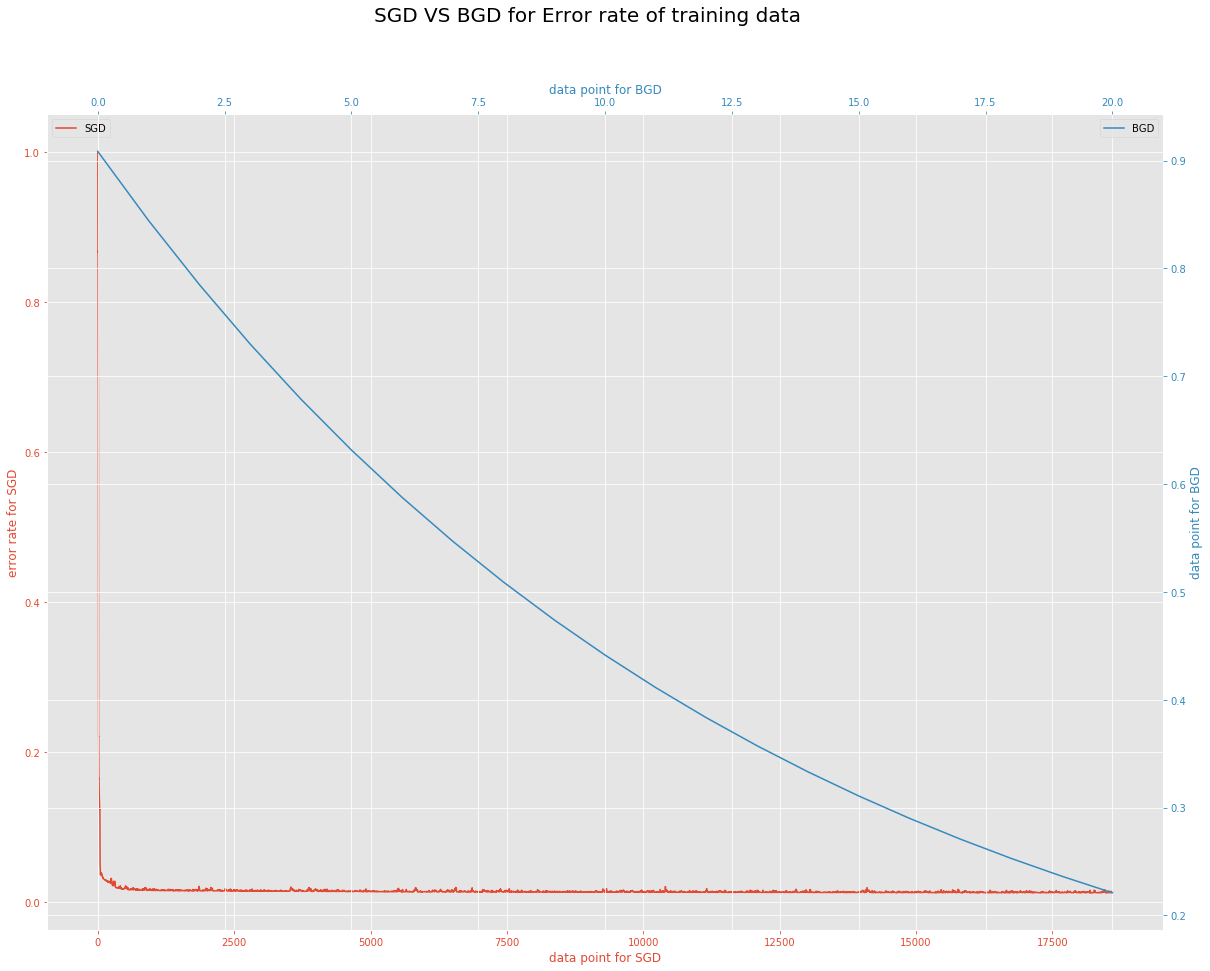

In [16]:
#set figure size
fig=plt.figure(figsize=(20,15))
#add a subplot sgd
ax=fig.add_subplot(111, label="1")
#add a subplot bgd
ax2=fig.add_subplot(111, label="2", frame_on=False)
#set title
fig.suptitle('SGD VS BGD for Error rate of training data', fontsize=20)

#plotting sgd: x label is data points, y label is error rate, set color and label
ax.plot(sgd_errors['index'], sgd_errors['train_rate'], color="C0",label="SGD")
ax.set_xlabel("data point for SGD", color="C0")
ax.set_ylabel("error rate for SGD", color="C0")
#set x_axis and colors
ax.tick_params(axis='x', colors="C0")
#set y_axis and colors
ax.tick_params(axis='y', colors="C0")
#set legend
ax.legend(loc='upper left')

#plotting bgd: x label is data points, y label is error rate, set color and label
ax2.plot(bgd_errors['index'], bgd_errors['train_rate'], color="C1",label="BGD")
#set x axis tick on the top
ax2.xaxis.tick_top()
#set y axis tick on the right
ax2.yaxis.tick_right()
#set x label and y label
ax2.set_xlabel('data point for BGD', color="C1") 
ax2.set_ylabel('data point for BGD', color="C1") 
#set x axis label position
ax2.xaxis.set_label_position('top') 
#set y axis label position
ax2.yaxis.set_label_position('right') 
#set tick colors
ax2.tick_params(axis='x', colors="C1")
ax2.tick_params(axis='y', colors="C1")
#set legend
ax2.legend(loc="upper right")

plt.show()
#plt.savefig('myfig5.png', dpi=1000)

plotting test dataset with 2 dimensions (2 x-axis and 2 y-axis)

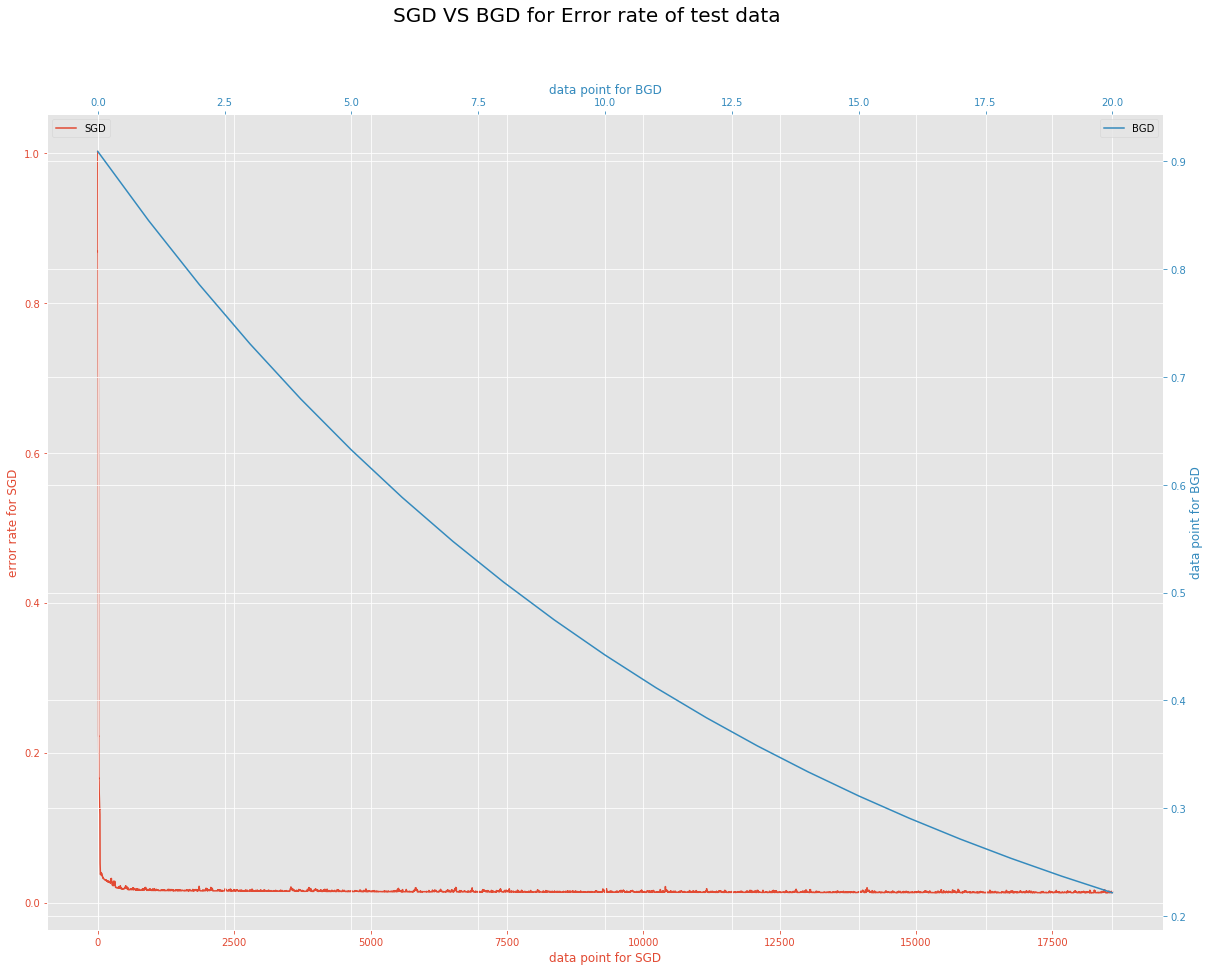

In [17]:
#set figure size
fig=plt.figure(figsize=(20,15))
#add a subplot sgd
ax=fig.add_subplot(111, label="1")
#add a subplot bgd
ax2=fig.add_subplot(111, label="2", frame_on=False)
#set title
fig.suptitle('SGD VS BGD for Error rate of test data', fontsize=20)

#plotting sgd: x label is data points, y label is error rate, set color and label
ax.plot(sgd_errors['index'], sgd_errors['test_rate'], color="C0",label="SGD")
ax.set_xlabel("data point for SGD", color="C0")
ax.set_ylabel("error rate for SGD", color="C0")
#set x_axis and colors
ax.tick_params(axis='x', colors="C0")
#set y_axis and colors
ax.tick_params(axis='y', colors="C0")
#set legend
ax.legend(loc='upper left')

#plotting bgd: x label is data points, y label is error rate, set color and label
ax2.plot(bgd_errors['index'], bgd_errors['test_rate'], color="C1",label="BGD")
#set x axis tick on the top and y on the right
ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
#set x and y label
ax2.set_xlabel('data point for BGD', color="C1") 
ax2.set_ylabel('data point for BGD', color="C1") 
#set label positions
ax2.xaxis.set_label_position('top') 
ax2.yaxis.set_label_position('right') 
#set ticks and colors
ax2.tick_params(axis='x', colors="C1")
ax2.tick_params(axis='y', colors="C1")
#set legend
ax2.legend(loc="upper right")


plt.show()
#plt.savefig('myfig6.png', dpi=1000)

### Summary:

From the graph, we can see that the error rate of SGD is decreasing very fast at first when the data points does not increase too much. And then it reaches to a lowest error rate and after that it tends to be a plateau that looks kind of flatted out. That means the learning algorithm has been converged. Because these are over just a thousand examples, error rates are little bit noisy after converging to a smallest error at very begining. Batch gradient descent is very great for convex, or relatively smooth error. It moves somewhat directly towards an optimum solution, either local or global.

In terms of stochastic gradient descent, the error rate shows a curve decreasing very gently with the datapoints increasing. The reason in this case is that SGD does not just converge to the global minimum. Its parameters will oscillate a bit around global minimum. That's why it is a curve rather than a straight line. Single samples are really noisy compared with BGD. Therefore, the stochastic gradient descent method will get close to the optimal value much faster than the batch method, but will never fully converge to the local (or global) minimum. Thus the stochastic gradient descent method is useful when we want a quick and dirty approximation for the solution to our optimization problem. 